In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches
from scipy.io import loadmat
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.text import Text
from matplotlib.legend_handler import HandlerLine2D

In [2]:
path_np = os.path.abspath('../../../1_Simulation_Results/numpy_files/')
path_csv = os.path.abspath('../../../0_MOOSE_Input_Files/Heat_Sources/')

colormap_data = loadmat('../cold2hot.mat')
cold2hot = ListedColormap(colormap_data['colormap'])
hot2cold = ListedColormap(colormap_data['colormap'][::-1])

In [3]:
timeS_GF = np.load(path_np+'/Gaussian/Fitting/time.npy')
temp_GF = np.load(path_np+'/Gaussian/Fitting/temp.npy')
timeS_FF = np.load(path_np+'/FlatTop/Fitting/time.npy')
temp_FF = np.load(path_np+'/FlatTop/Fitting/temp.npy')

timeS_RF = np.load(path_np+'/Ring/Fitting/time.npy')
temp_RF = np.load(path_np+'/Ring/Fitting/temp.npy')
vel_RF = np.load(path_np+'/Ring/Fitting/vel.npy')

timeS_RT = np.load(path_np+'/Ring/TDB/time.npy')
vel_RT = np.load(path_np+'/Ring/TDB/vel.npy')

timeS_BT = np.load(path_np+'/Bessel/TDB/time.npy')
temp_BT = np.load(path_np+'/Bessel/TDB/temp.npy')
vel_BT = np.load(path_np+'/Bessel/TDB/vel.npy')

timeS_BF = np.load(path_np+'/Bessel/Fitting/time.npy')
vel_BF = np.load(path_np+'/Bessel/Fitting/vel.npy')

In [4]:
G_Tdb = pd.read_csv(path_csv+'/Gaussian/TDB/exodus/Au-Au.csv',     encoding='utf-8')
G_Fit = pd.read_csv(path_csv+'/Gaussian/Fitting/exodus/Au-Au.csv', encoding='utf-8')
F_Tdb = pd.read_csv(path_csv+'/FlatTop/TDB/exodus/Au-Au.csv',      encoding='utf-8')
R_Tdb = pd.read_csv(path_csv+'/Ring/TDB/exodus/Au-Au.csv',         encoding='utf-8')

In [5]:
G_Tdb.head()

,time,area_h1,temp_avg,temp_max,temp_min
0,0.000000,2680.208333,0.000000,0.000000,0.000000
1,0.003750,2674.073779,328.028640,496.117727,300.003170
2,0.007500,2667.864760,338.529616,559.313451,300.004921
3,0.011250,2661.690767,351.368098,646.577127,300.006491
4,0.013125,2658.647133,359.100675,700.915522,300.007363


In [5]:
def max_vel_array(array):
    maxVel_array = np.zeros(array.shape[-1])
    for i in range(array.shape[-1]):
        maxVel_array[i] = array[0:1,:,i].max()
    return maxVel_array

maxVel_RT = max_vel_array(vel_RT)
maxVel_RF = max_vel_array(vel_RF)
maxVel_BT = max_vel_array(vel_BT)
maxVel_BF = max_vel_array(vel_BF)

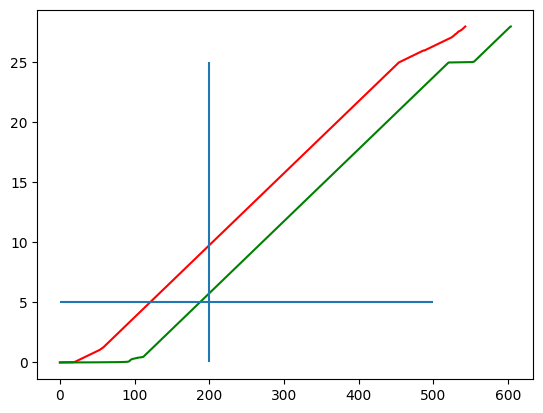

In [7]:
plt.plot(G_Tdb['time'], color='red')
plt.plot(G_Fit['time'], color='green')
plt.hlines(y=5, xmin=0, xmax=500)
plt.vlines(x=200, ymin=0, ymax=25)
plt.show()

## Area, Time-temp

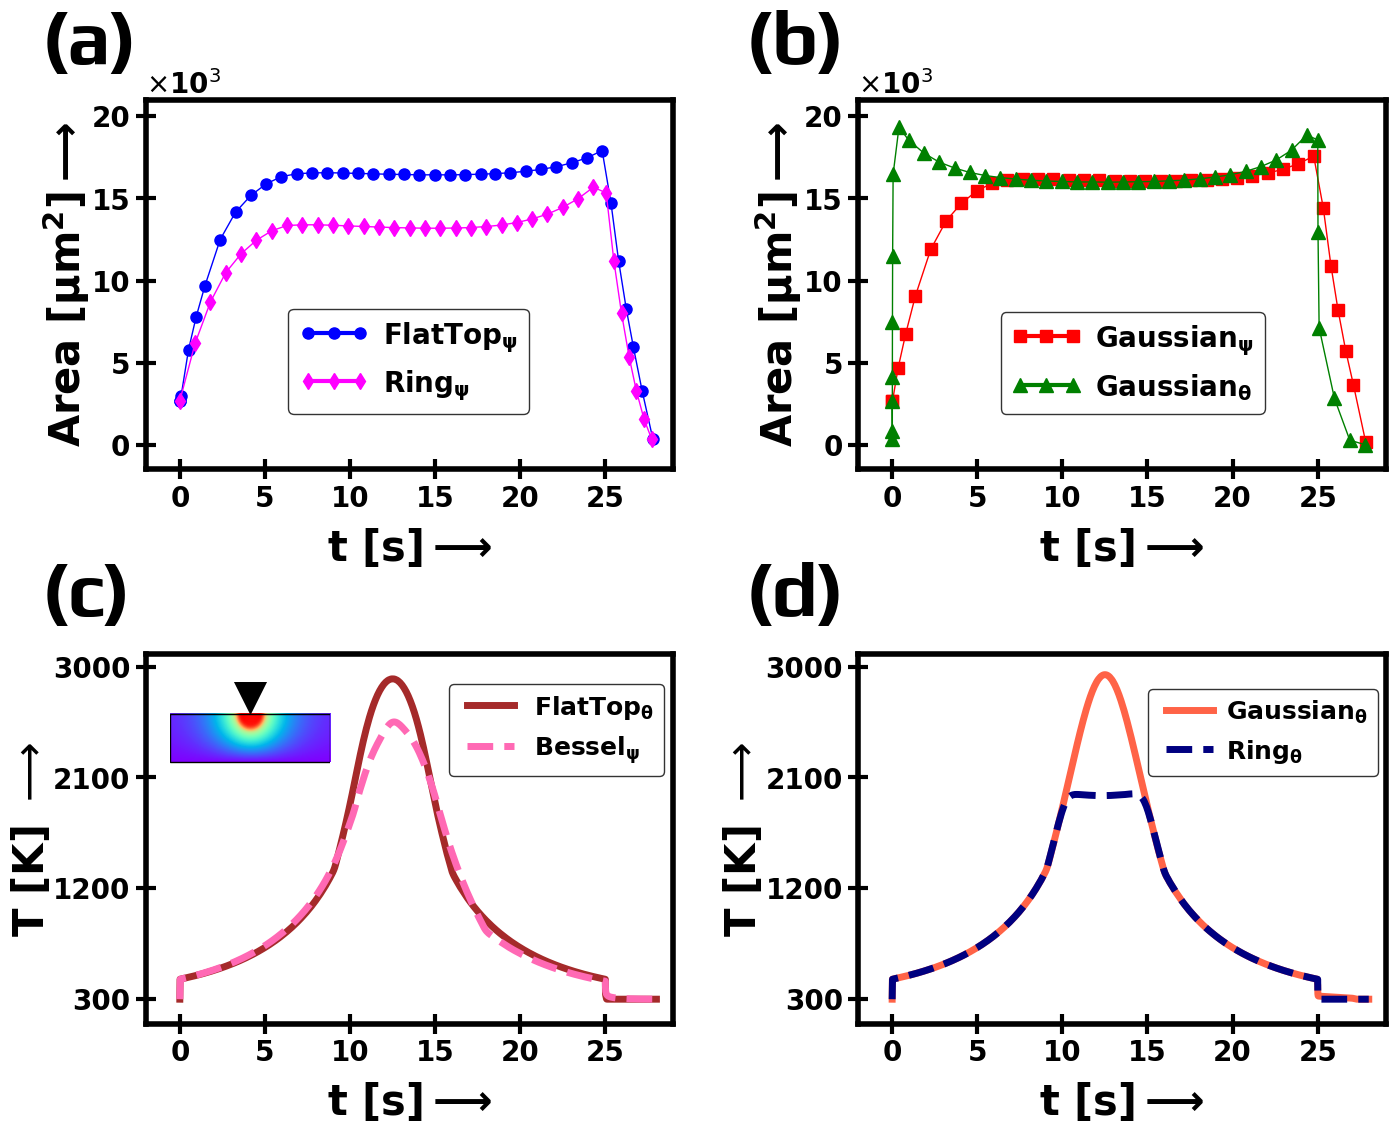

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[16, 12], frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
ax2.set_facecolor((0, 0, 0, 0))
ax3.set_facecolor((0, 0, 0, 0))
ax4.set_facecolor((0, 0, 0, 0))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.5)

x = int((401/1000)*500) # x-coordinate of point of interest
y = 0 # y coordinate of point of interest ## origin is at top left corner

FT, = ax1.plot(F_Tdb['time'].iloc[::15], F_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='o', markersize=8, color = 'blue', label =r'FlatTop$\mathbf{_{\psi}}$')
RT, = ax1.plot(R_Tdb['time'].iloc[::15], R_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='d', markersize=8, color = 'magenta', label =r'Ring$\mathbf{_{\psi}}$')
ax1.set_ylabel(r"Area $ \mathbf{ [\mu m^2] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax1.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax1.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax1.set_yticks([0, 5_000, 10_000, 15_000, 20_000, 25_000], labels=['0', '5', '10', '15', '20', '25'], size=20, color='k', weight='bold')
ax1.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=20, weight='bold')
# ax1.set_title("Flat-Top HS", fontsize=30, weight='bold', pad=10)
ax1.set_ylim(-1500, 21000)
ax1.set_xlim(-2, 29)
ax1.spines[:].set_linewidth(4)
ax1.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_FR = ax1.legend(loc=(0.27, 0.15), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'20',}, handler_map={FT: HandlerLine2D(numpoints=3), RT: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(3.0) for line in legend_FR.get_lines()]

GT, = ax2.plot(G_Tdb['time'].iloc[::15], G_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', mec='red', mfc='red', color = 'red',  marker='s', markersize=8, label =r'Gaussian$\mathbf{_{\psi}}$')
GF, = ax2.plot(G_Fit['time'].iloc[::15], G_Fit['area_h1'].iloc[::15], linewidth=1, linestyle='-', color='green',  marker='^', markersize=10, label=r'Gaussian$\mathbf{_{\theta}}$')
ax2.set_ylabel(r"Area $ \mathbf{ [\mu m^2] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax2.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax2.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax2.set_yticks([0, 5_000, 10_000, 15_000, 20_000, 25_000], labels=['0', '5', '10', '15', '20', '25'], size=20, color='k', weight='bold')
ax2.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=20, weight='bold')
# ax2.set_title("Gaussian HS", fontsize=30, weight='bold', pad=10)
ax2.set_ylim(-1500, 21000)
ax2.set_xlim(-2, 29)
ax2.spines[:].set_linewidth(4)
ax2.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_G = ax2.legend(loc=(0.27, 0.15), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'20',}, handler_map={GT: HandlerLine2D(numpoints=3), GF: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(3.0) for line in legend_G.get_lines()]


FF, = ax3.plot(timeS_FF, temp_FF[0,200,:], linewidth=5, linestyle='-',  color = 'brown', label =r'FlatTop$\mathbf{_{\theta}}$')
BT, = ax3.plot(timeS_BT, temp_BT[0,200,:], linewidth=5, linestyle='--',  color='hotpink', label=r'Bessel$\mathbf{_{\psi}}$')
ax3.set_ylabel(r"T [K] $\longrightarrow$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax3.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax3.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax3.set_yticks([300, 1_200, 2_100, 3_000], labels=['300', '1200', '2100', '3000'], size=20, color='k', weight='bold')
ax3.set_ylim(100, 3100)
ax3.set_xlim(-2, 29)
ax3.spines[:].set_linewidth(4)
ax3.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_FB = ax3.legend(loc=(0.575, 0.67), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'18',}, handler_map={FF: HandlerLine2D(numpoints=3), BT: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(5) for line in legend_FB.get_lines()]


GF, = ax4.plot(timeS_GF, temp_GF[0,x,:], linewidth=5, linestyle='-',  color = 'tomato', label =r'Gaussian$\mathbf{_{\theta}}$')
RF, = ax4.plot(timeS_RF, temp_RF[0,x,:], linewidth=5, linestyle='--',  color='navy', label=r'Ring$\mathbf{_{\theta}}$')
ax4.set_ylabel(r"T [K] $\longrightarrow$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax4.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax4.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax4.set_yticks([300, 1_200, 2_100, 3_000], labels=['300', '1200', '2100', '3000'], size=20, color='k', weight='bold')
ax4.set_ylim(100, 3100)
ax4.set_xlim(-2, 29)
ax4.spines[:].set_linewidth(4)
ax4.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_GR = ax4.legend(loc=(0.55, 0.67), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'18',}, handler_map={GF: HandlerLine2D(numpoints=3), RF: HandlerLine2D(numpoints=3)}, handletextpad=0.2, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(5) for line in legend_GR.get_lines()]

ax7 = fig.add_axes([0.14, 0.31, 0.1, 0.1], frameon=False) 
ax7.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False,)
hmap5 = ax7.imshow(temp_RF[:,:,275], cmap='rainbow', vmin=300, aspect=0.6,  interpolation='quadric')
ax7.plot(200, -120, marker='v', markersize=40, color='k')
ax7.spines[:].set_linewidth(0)
ax7.add_patch(patches.Rectangle((0, -1), 400, 202, linewidth=1, edgecolor='k', facecolor='none'))

text_a = Text(x=0.06, y=0.91, text=r'(a)', fontsize=55, color='k', rotation=0, weight='bold', fontname='Play')
text_b = Text(x=0.5, y=0.91, text=r'(b)', fontsize=55, color='k', rotation=0, weight='bold', fontname='Play')
text_c = Text(x=0.06, y=0.45, text=r'(c)', fontsize=55, color='k', rotation=0, weight='bold', fontname='Play')
text_d = Text(x=0.5, y=0.45, text=r'(d)', fontsize=55, color='k', rotation=0, weight='bold', fontname='Play')

fig.add_artist(text_a)
fig.add_artist(text_b)
fig.add_artist(text_c)
fig.add_artist(text_d)

# plt.savefig('../../figures/Area_Tt.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Area_Tt.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Area_Tt.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Area_Tt.jpg',bbox_inches='tight',)

plt.show()

## Area, Time-Temp, Velocity

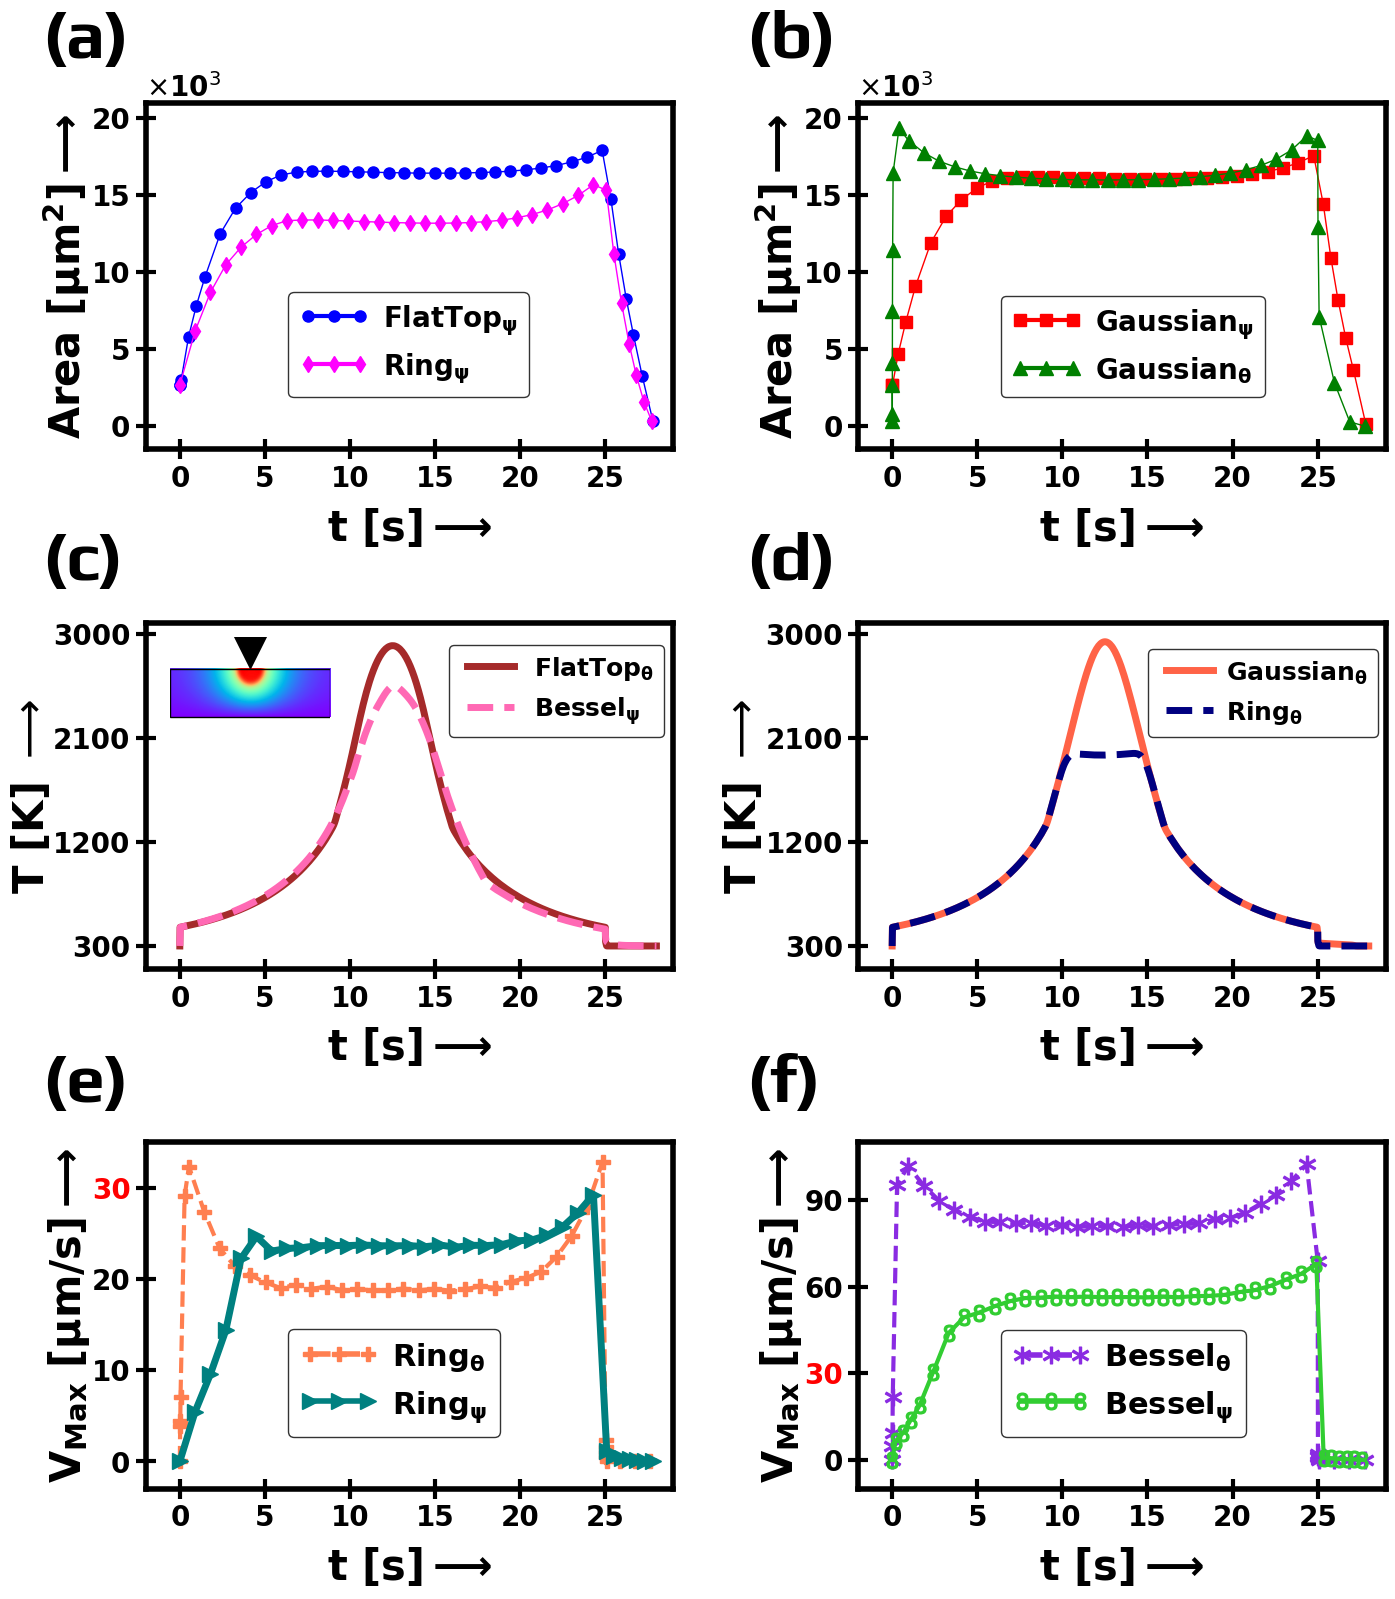

In [10]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=[16, 18], frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
ax2.set_facecolor((0, 0, 0, 0))
ax3.set_facecolor((0, 0, 0, 0))
ax4.set_facecolor((0, 0, 0, 0))
ax5.set_facecolor((0, 0, 0, 0))
ax6.set_facecolor((0, 0, 0, 0))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.5)

x = int((401/1000)*500) # x-coordinate of point of interest
y = 0 # y coordinate of point of interest ## origin is at top left corner

FT, = ax1.plot(F_Tdb['time'].iloc[::15], F_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='o', markersize=8, color = 'blue', label =r'FlatTop$\mathbf{_{\psi}}$')
RT, = ax1.plot(R_Tdb['time'].iloc[::15], R_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='d', markersize=8, color = 'magenta', label =r'Ring$\mathbf{_{\psi}}$')
ax1.set_ylabel(r"Area $ \mathbf{ [\mu m^2] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax1.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax1.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax1.set_yticks([0, 5_000, 10_000, 15_000, 20_000, 25_000], labels=['0', '5', '10', '15', '20', '25'], size=20, color='k', weight='bold')
ax1.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=20, weight='bold')
# ax1.set_title("Flat-Top HS", fontsize=30, weight='bold', pad=10)
ax1.set_ylim(-1500, 21000)
ax1.set_xlim(-2, 29)
ax1.spines[:].set_linewidth(4)
ax1.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_FR = ax1.legend(loc=(0.27, 0.15), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'20',}, handler_map={FT: HandlerLine2D(numpoints=3), RT: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(3.0) for line in legend_FR.get_lines()]

GT, = ax2.plot(G_Tdb['time'].iloc[::15], G_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', mec='red', mfc='red', color = 'red',  marker='s', markersize=8, label =r'Gaussian$\mathbf{_{\psi}}$')
GF, = ax2.plot(G_Fit['time'].iloc[::15], G_Fit['area_h1'].iloc[::15], linewidth=1, linestyle='-', color='green',  marker='^', markersize=10, label=r'Gaussian$\mathbf{_{\theta}}$')
ax2.set_ylabel(r"Area $ \mathbf{ [\mu m^2] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax2.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax2.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax2.set_yticks([0, 5_000, 10_000, 15_000, 20_000, 25_000], labels=['0', '5', '10', '15', '20', '25'], size=20, color='k', weight='bold')
ax2.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=20, weight='bold')
# ax2.set_title("Gaussian HS", fontsize=30, weight='bold', pad=10)
ax2.set_ylim(-1500, 21000)
ax2.set_xlim(-2, 29)
ax2.spines[:].set_linewidth(4)
ax2.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_G = ax2.legend(loc=(0.27, 0.15), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'20',}, handler_map={GT: HandlerLine2D(numpoints=3), GF: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(3.0) for line in legend_G.get_lines()]


FF, = ax3.plot(timeS_FF, temp_FF[0,200,:], linewidth=5, linestyle='-',  color = 'brown', label =r'FlatTop$\mathbf{_{\theta}}$')
BT, = ax3.plot(timeS_BT, temp_BT[0,200,:], linewidth=5, linestyle='--',  color='hotpink', label=r'Bessel$\mathbf{_{\psi}}$')
ax3.set_ylabel(r"T [K] $\longrightarrow$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax3.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax3.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax3.set_yticks([300, 1_200, 2_100, 3_000], labels=['300', '1200', '2100', '3000'], size=20, color='k', weight='bold')
ax3.set_ylim(100, 3100)
ax3.set_xlim(-2, 29)
ax3.spines[:].set_linewidth(4)
ax3.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_FB = ax3.legend(loc=(0.575, 0.67), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'18',}, handler_map={FF: HandlerLine2D(numpoints=3), BT: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(5) for line in legend_FB.get_lines()]


GF, = ax4.plot(timeS_GF, temp_GF[0,x,:], linewidth=5, linestyle='-',  color = 'tomato', label =r'Gaussian$\mathbf{_{\theta}}$')
RF, = ax4.plot(timeS_RF, temp_RF[0,x,:], linewidth=5, linestyle='--',  color='navy', label=r'Ring$\mathbf{_{\theta}}$')
ax4.set_ylabel(r"T [K] $\longrightarrow$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax4.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax4.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax4.set_yticks([300, 1_200, 2_100, 3_000], labels=['300', '1200', '2100', '3000'], size=20, color='k', weight='bold')
ax4.set_ylim(100, 3100)
ax4.set_xlim(-2, 29)
ax4.spines[:].set_linewidth(4)
ax4.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_GR = ax4.legend(loc=(0.55, 0.67), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'18',}, handler_map={GF: HandlerLine2D(numpoints=3), RF: HandlerLine2D(numpoints=3)}, handletextpad=0.2, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(5) for line in legend_GR.get_lines()]


RF, = ax5.plot(timeS_RF[::15], maxVel_RF[::15], linewidth=3, linestyle='--', marker='P', markersize=10, color='coral', label=r'Ring$\mathbf{_{\theta}}$')
RT, = ax5.plot(timeS_RT[::15], maxVel_RT[::15], linewidth=5, linestyle='-',  marker='>', markersize=12, color = 'teal', label =r'Ring$\mathbf{_{\psi}}$')
ax5.set_ylabel(r"V$_\mathbf{{Max}}$ $ \mathbf{ [\mu m/s] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax5.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax5.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax5.set_yticks([0, 10, 20, 30, ], labels=['0', '10', '20', '30',], size=20, color='k', weight='bold')
for label, color in zip(ax5.get_yticklabels(), ['k', 'k', 'k', 'red']): label.set_color(color)
ax5.set_ylim(-3, 35)
ax5.set_xlim(-2, 29)
ax5.spines[:].set_linewidth(4)
ax5.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_R = ax5.legend(loc=(0.27, 0.15), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'22',}, handler_map={RT: HandlerLine2D(numpoints=3), RF: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(4) for line in legend_R.get_lines()]
# ax5.hlines(y=30, xmin=-2, xmax=29, linewidth=2, linestyle=':', color='red')

BF, = ax6.plot(timeS_BF[::15], maxVel_BF[::15], linewidth=3, linestyle='--',marker='$*$', markersize=12, color='blueviolet', label=r'Bessel$\mathbf{_{\theta}}$')
BT, = ax6.plot(timeS_BT[::15], maxVel_BT[::15], linewidth=3, linestyle='-',marker='$8$', markersize=12, color = 'limegreen', label =r'Bessel$\mathbf{_{\psi}}$')
ax6.set_ylabel(r"V$_\mathbf{{Max}}$ $ \mathbf{ [\mu m/s] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax6.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax6.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax6.set_yticks([0, 30, 60, 90, ], labels=['0', '30', '60', '90',], size=20, color='k', weight='bold')
for label, color in zip(ax6.get_yticklabels(), ['k', 'red', 'k', 'k']): label.set_color(color)
    
ax6.set_ylim(-10, 110)
ax6.set_xlim(-2, 29)
ax6.spines[:].set_linewidth(4)
ax6.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_B = ax6.legend(loc=(0.27, 0.15), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'22',}, handler_map={BT: HandlerLine2D(numpoints=3), BF: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(4) for line in legend_B.get_lines()]
# ax6.hlines(y=30, xmin=-2, xmax=29, linewidth=2, linestyle=':', color='red')

ax7 = fig.add_axes([0.14, 0.51, 0.1, 0.1], frameon=False) 
ax7.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False,)
hmap5 = ax7.imshow(temp_RF[:,:,275], cmap='rainbow', vmin=300, aspect=0.6,  interpolation='quadric')
ax7.plot(200, -120, marker='v', markersize=40, color='k')
ax7.spines[:].set_linewidth(0)
ax7.add_patch(patches.Rectangle((0, -1), 400, 202, linewidth=1, edgecolor='k', facecolor='none'))

text_a = Text(x=0.06, y=0.905, text=r'(a)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
text_b = Text(x=0.5, y=0.905, text=r'(b)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
text_c = Text(x=0.06, y=0.615, text=r'(c)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
text_d = Text(x=0.5, y=0.615, text=r'(d)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
text_e = Text(x=0.06, y=0.325, text=r'(e)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
text_f = Text(x=0.5, y=0.325, text=r'(f)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
fig.add_artist(text_a)
fig.add_artist(text_b)
fig.add_artist(text_c)
fig.add_artist(text_d)
fig.add_artist(text_e)
fig.add_artist(text_f)


# plt.savefig('../../figures/Area_Tt_vel.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Area_Tt_vel.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Area_Tt_vel.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Area_Tt_vel.jpg',bbox_inches='tight',)

plt.show()